In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '5'
from torch.utils.data import DataLoader
import sys
sys.path.append('/home/mei/nas/docker/thesis/model_train')
from dataloader.ts_reader import MultiModalDataset,VitalSignsDataset,vital_pre_train
from model.pre_train_ae import  RecurrentAutoencoder
from model.pre_train_ae_loss_train import  *

import gc
gc.collect()

import torch
torch.cuda.empty_cache()

In [ ]:

vital_signs_train = '/home/mei/nas/docker/thesis/data/hdf/train/ts_each_patient.h5'
vital_signs_val = '/home/mei/nas/docker/thesis/data/hdf/val/ts_each_patient.h5'
vital_signs_test = '/home/mei/nas/docker/thesis/data/hdf/test/ts_each_patient.h5'

train_dataset = VitalSignsDataset(vital_signs_train)
val_dataset = VitalSignsDataset(vital_signs_val)
test_dataset = VitalSignsDataset(vital_signs_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=vital_pre_train)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train) 
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

small_data_iter = iter(train_loader) 
inputs, lengths = next(small_data_iter)   

small_dataset = TensorDataset(inputs, lengths)
small_train_loader = DataLoader(small_dataset, batch_size=len(inputs), shuffle=True) 

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = 154  
embedding_dim = 128
n_heads = 2
model = RecurrentAutoencoder(n_features, embedding_dim,n_heads).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [5]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_v2.pth'
history_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/history_v2.json'
output_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/output_v2.pt'
model, history = train_model(model, train_loader, small_train_loader, optimizer, device, num_epochs=100, save_model_path=save_path, history_path=history_path,best_output_path=output_path)

Epoch 1/100 | Train Recon: 0.1676 | Val Recon: 0.1380
Epoch 11/100 | Train Recon: 0.1454 | Val Recon: 0.1358
Epoch 21/100 | Train Recon: 0.1609 | Val Recon: 0.1455
Epoch 31/100 | Train Recon: 0.1657 | Val Recon: 0.1464
Epoch 41/100 | Train Recon: 0.1606 | Val Recon: 0.1457
Epoch 51/100 | Train Recon: 0.1656 | Val Recon: 0.1456
Epoch 61/100 | Train Recon: 0.1675 | Val Recon: 0.1454
Epoch 71/100 | Train Recon: 0.1623 | Val Recon: 0.1461
Epoch 81/100 | Train Recon: 0.1644 | Val Recon: 0.1455
Epoch 91/100 | Train Recon: 0.1623 | Val Recon: 0.1455
Saved best model to /home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_v2.pth
Saved model outputs to outputs/best_outputs.pt
Saved training history to /home/mei/nas/docker/thesis/data/model_results/pre_train/history_v2.json


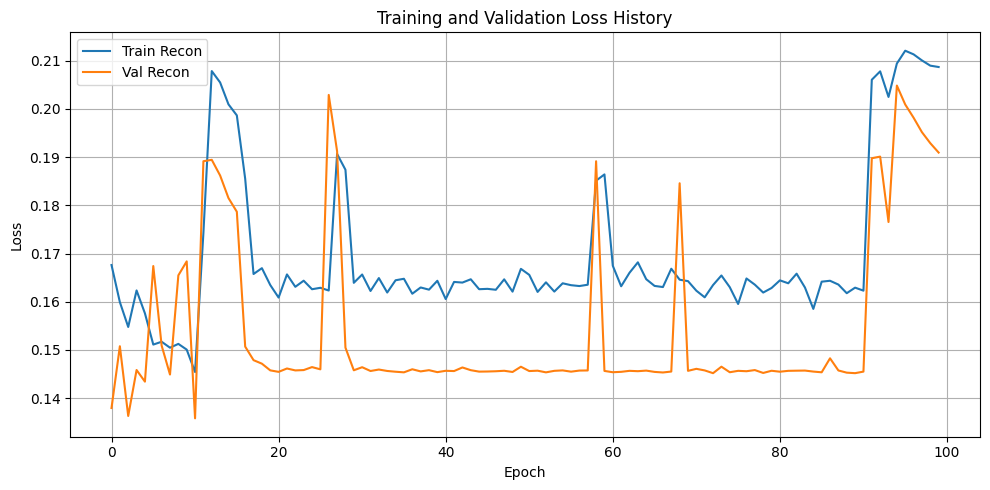

In [6]:
plot_history(history)

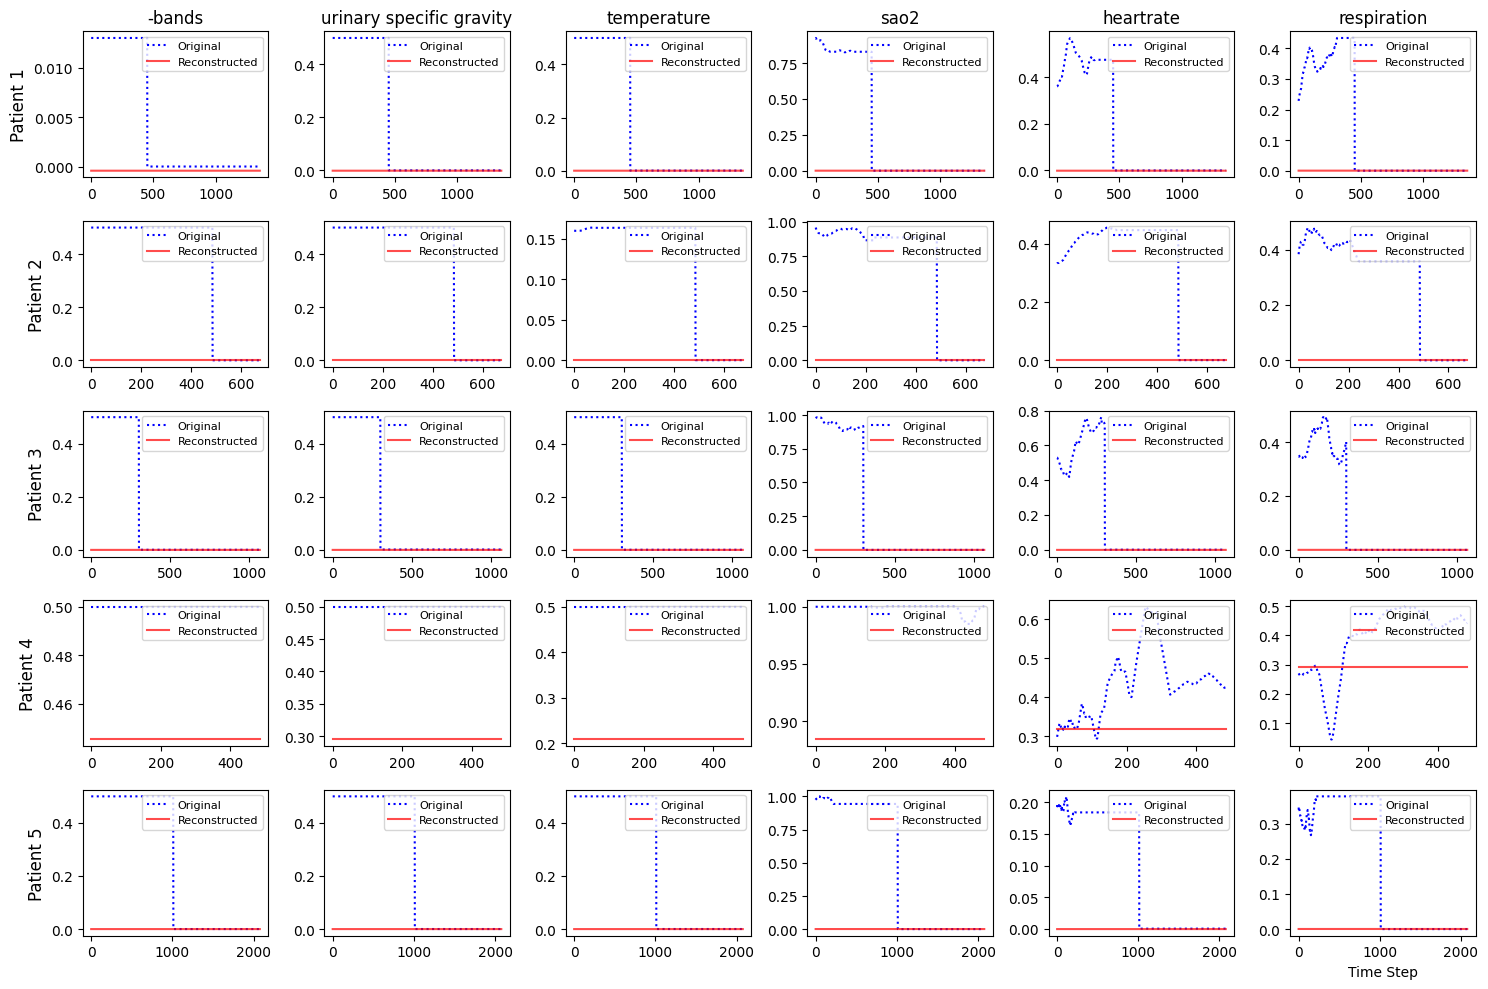

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [0,142,143,144,145,146]  #

visualize_recons(model, small_train_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)